# Домашнее задание 2 - Компьютерное зрение

Для решения ДЗ вам очень помогут семинары 3 и 4 занятий

Напоминаю, как сдаем дз
1. Копируем этот ноутбук (Файл -> Сохранить копию на Диске)
2. **Пишем свой ТГ**, чтобы легче было потом связаться. О результатах проверки сообщим в личные сообщения в телеграме!
3. Листаем, заполняем пропущенные ячейки, выполняем задания
4. Когда закончите - в левом верхнем углу нажимаете Поделиться, в общем доступе обязательно указываем "Все, у кого есть ссылка", далее нажимаем Копировать ссылку и прикладываем ссылку на степик в ответ к дз
5. Ждем фидбек в тг)

#### Дедлайн сдачи ДЗ
**26 октября 23:59** очень прошу не опаздывать! Фидбек начнем рассылать после дедлайна дз, постараемся все проверить до дедлайна следующего ДЗ

#### Задачи
1. Имплементируем операцию свертки на Numpy<br>
2. Угадываем персонажа из симпсонов <br>

Всего можно получить 10 баллов + доп. баллы по настроению проверяющего)) <br>
По всем вопросам: @daniil_d_d <br>
**Удачи!**

@metalrokus

# Задача 1. Имплементируем операцию свертки на Numpy

настоятельно прошу решать без чатгпт((( лучше спросите в чате курса. Очевидно чатгпт за один запрос напишет, так не интересно

Вам предстоит реализовать операцию свертки, которую мы обсуждали на лекции. <br>
Кому нужно вспомнить, что это такое: https://youtu.be/xWMCjHj7gWU?si=WysBWUdfTzjw_Y1W <br>
Или текстом: https://education.yandex.ru/handbook/ml/article/svyortochnye-nejroseti

Кому сложно с numpy -> смотрим 1-2 семинары, их ноутбуки <br>
а еще смотрим такой гайд https://numpy.org/doc/stable/user/absolute_beginners.html <br>
ну и на крайняк идем в чат)

Решение нужно реализовать на numpy, без использования других библиотек. Будем сравнивать ваш код с реализацией на pytorch)
Важно понимать, что numpy очень оптимизирован под тензорные вычисления, операции с матрицами. Поэтому, ваше решение будет также оцениваться на эффективность кода, вот некоторые подсказки https://www.slingacademy.com/article/how-to-optimize-numpy-code-for-performance/

In [1]:
import numpy as np
import torch
import torch.nn.functional as F

image = np.array([
    [1, 2, 0, 3, 1],
    [4, 1, 0, 1, 7],
    [2, 3, 2, 1, 0],
    [0, 1, 3, 1, 2],
    [1, 2, 1, 0, 1]
], dtype=float)


kernel = np.array([
    [1, 2, -1],
    [0, 3, 2],
    [1, 4, -1]
], dtype=float)

def conv2d_numpy(x: np.ndarray, w: np.ndarray, stride: int = 1, padding: int = 0) -> np.ndarray:
    """
    Выполняет 2D свёртку входного изображения с заданным ядром (kernel)

    Params:
    x : np.ndarray
        Входное изображение размером (H, W), где
        H — высота, W — ширина.
    w : np.ndarray
        Ядро свёртки (фильтр) размером (kH, kW), где
        kH — высота фильтра, kW — ширина фильтра.
    stride : int, optional (по умолчанию 1)
        Шаг, с которым ядро перемещается по изображению.
    padding : int, optional (по умолчанию 0)
        Количество нулевых пикселей, добавляемых по всем краям изображения.

    Возвращает
    ----------
    np.ndarray
        Результат свёртки
    """

    # Your code here :)
    x = np.pad(x, pad_width=padding)

    # размер изображения
    H, W = x.shape

    # размер ядра
    Hk, Wk = w.shape

    # считаем размеры выходного изображения (сразу переводим в int)
    Hout = (H - Hk) // stride + 1
    Wout = (W - Wk) // stride + 1

    # выходная матрица (все элементы по умолчанию нули)
    out = np.zeros((Hout, Wout))

    for i in range(Hout):
        for j in range(Wout):
            # вычисления по полю, покрываемому ядром
            field = x[i * stride:i * stride + Hk, j * stride:j * stride + Wk]
            out[i, j] = np.sum(field * w)

    return out

Это просто тесты, которые проверят корректность твоего решения) Внимательно читай текст ошибки

In [2]:
# Самый базовый случай, без паддинга
stride, padding = 1, 0
print(f"\nTest 1: stride={stride}, padding={padding}")
out_numpy = conv2d_numpy(image, kernel, stride=stride, padding=padding)
out_torch = F.conv2d(
    torch.tensor(image).unsqueeze(0).unsqueeze(0).float(),
    torch.tensor(kernel).unsqueeze(0).unsqueeze(0).float(),
    stride=stride, padding=padding
)
assert np.allclose(out_numpy, out_torch.squeeze().numpy()), "Test 1 не прошел, неверно реализовали свертку"
print("Test 1 пройден")


# Проверка страйда > 1
stride, padding = 2, 0
print(f"\nTest 2: stride={stride}, padding={padding}")
out_numpy = conv2d_numpy(image, kernel, stride=stride, padding=padding)
out_torch = F.conv2d(
    torch.tensor(image).unsqueeze(0).unsqueeze(0).float(),
    torch.tensor(kernel).unsqueeze(0).unsqueeze(0).float(),
    stride=stride, padding=padding
)
assert np.allclose(out_numpy, out_torch.squeeze().numpy()), "Test 2 не прошел, проверь как сдвигаешь окна, размер выходов"
print("Test 2 пройден")


# Проверяем как реализованы паддинги
stride, padding = 1, 1
print(f"\nTest 3: stride={stride}, padding={padding}")
out_numpy = conv2d_numpy(image, kernel, stride=stride, padding=padding)
out_torch = F.conv2d(
    torch.tensor(image).unsqueeze(0).unsqueeze(0).float(),
    torch.tensor(kernel).unsqueeze(0).unsqueeze(0).float(),
    stride=stride, padding=padding
)
assert np.allclose(out_numpy, out_torch.squeeze().numpy()), "Test 3 не прошел, проверь как реализованы падинги"
print("Test 3 пройден")


# А теперь комбинация большого паддинга и stride
stride, padding = 2, 2
print(f"\nTest 4: stride={stride}, padding={padding}")
out_numpy = conv2d_numpy(image, kernel, stride=stride, padding=padding)
out_torch = F.conv2d(
    torch.tensor(image).unsqueeze(0).unsqueeze(0).float(),
    torch.tensor(kernel).unsqueeze(0).unsqueeze(0).float(),
    stride=stride, padding=padding
)
assert np.allclose(out_numpy, out_torch.squeeze().numpy()), "Test 4 не прошел, проверь размерности выхода, ошибки в сдвигах, падингах"
print("Test 4 пройден")



Test 1: stride=1, padding=0
Test 1 пройден

Test 2: stride=2, padding=0
Test 2 пройден

Test 3: stride=1, padding=1
Test 3 пройден

Test 4: stride=2, padding=2
Test 4 пройден


# Задача 2. Угадываем персонажа из симпсонов

Вам предстоит реализовать классификатор - сверточную нейросеть для предсказания персонажа из мультика про симпсонов по фото героев)

После этого, возьмем готовый предобученный класификатор, попробуем его дообучить и сравним с первым решением)

Советуем включить вычисления на GPU (видеокарте). В Google Colab это можно сделать так: Среда выполнения -> сменить среду выполнения -> выбираем все, что доступно, кроме CPU (ЦП) и TPU (это тензорный процессор от гугла, кому интересно, спросите в чате, расскажу). Например можно выбрать T4 (кажется по дефолту только он и доступен

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import transforms
from torchvision import datasets, models, transforms

import PIL
from PIL import Image

import math
import random
import seaborn as sn
import pandas as pd
import numpy as np
from pathlib import Path
from skimage import io
import pickle
import matplotlib.pyplot as plt
import time
import os
import copy
from tqdm import tqdm_notebook
import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [4]:
# Скачиваем данные, работает в Google Colab, если хотите запустить на Kaggle или локально - удачи!
# но если что пишите в чат конечно же)

# если просит давать доступ к гугл диску - давайте, ставьте все галочки)))

In [5]:
!gdown --remaining-ok 1OHYqvP8T7M5N14Tvg8DcgXaohTWyLfh1 -O /content/simpsons_dataset.tar
!mkdir -p /content/simpson_dataset
!tar -xf "/content/simpsons_dataset.tar" -C "/content/simpson_dataset"

Downloading...
From (original): https://drive.google.com/uc?id=1OHYqvP8T7M5N14Tvg8DcgXaohTWyLfh1
From (redirected): https://drive.google.com/uc?id=1OHYqvP8T7M5N14Tvg8DcgXaohTWyLfh1&confirm=t&uuid=a7ea7ac5-2686-4035-85c2-981bad07f376
To: /content/simpsons_dataset.tar
100% 522M/522M [00:02<00:00, 228MB/s]


In [6]:
!gdown --remaining-ok 1m38V-OfxLrRwJqd3Iw2UpMJ9ugRIcFAz -O /content/kaggle_simpson_testset.zip
!mkdir -p /content/kaggle_simpson_testset
!unzip -q /content/kaggle_simpson_testset.zip -d /content/kaggle_simpson_testset

Downloading...
From: https://drive.google.com/uc?id=1m38V-OfxLrRwJqd3Iw2UpMJ9ugRIcFAz
To: /content/kaggle_simpson_testset.zip
100% 11.2M/11.2M [00:00<00:00, 134MB/s]


Теперь собираем датасет, тут в целом ничего интересного пока

In [7]:
train_dir = Path('/content/simpson_dataset/')
test_dir = Path('/content/kaggle_simpson_testset/kaggle_simpson_testset/')

In [8]:
class SimpsonTrainValPath():

  def __init__(self, train_dir, test_dir):

    self.train_dir = train_dir
    self.test_dir = test_dir
    self.train_val_files_path = sorted(list(self.train_dir.rglob('*.jpg')))
    self.test_path = sorted(list(self.test_dir.rglob('*.jpg')))
    self.train_val_labels = [path.parent.name for path in self.train_val_files_path]

  def get_path(self):

    train_files_path, val_files_path = train_test_split(self.train_val_files_path, test_size = 0.3, \
                                          stratify=self.train_val_labels)

    files_path = {'train': train_files_path, 'val': val_files_path}

    return files_path, self.test_path

  def get_n_classes(self):
    return len(np.unique(self.train_val_labels))

In [9]:
import re
from typing import List, Optional

def extract_label_from_filename(filename: str) -> str:
    """
    Извлекает лейбл из имени файла формата:
    'abraham_grampa_simpson_0.jpg' → 'abraham_grampa_simpson'
    """
    stem = Path(filename).stem
    match = re.match(r"^(.*)_(\d+)$", stem)
    return match.group(1) if match else stem

class SimpsonsDataset(Dataset):
    def __init__(self, files_path, data_transforms, is_test=False, label_encoder=None):
        self.files_path = files_path
        self.transform = data_transforms
        self.is_test = is_test

        if not is_test:
            self.labels_str = [p.parent.name for p in self.files_path]
        else:
            self.labels_str = [extract_label_from_filename(p.name) for p in self.files_path]

        if label_encoder is None:
            self.label_encoder = LabelEncoder()
            self.label_encoder.fit(self.labels_str)
        else:
            self.label_encoder = label_encoder

    def __len__(self):
        return len(self.files_path)

    def __getitem__(self, idx):
        img_path = self.files_path[idx]
        image = Image.open(img_path).convert("RGB")
        image = self.transform(image)

        label_str = self.labels_str[idx]
        label = self.label_encoder.transform([label_str]).item()

        return image, label

Здесь делаем трансформ в данных, препроцессинг

In [10]:
input_size = (256, 256)

data_transforms = transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # https://stackoverflow.com/questions/58151507/why-pytorch-officially-use-mean-0-485-0-456-0-406-and-std-0-229-0-224-0-2
    ])

In [11]:
train_val_paths, test_path = SimpsonTrainValPath(train_dir, test_dir).get_path()

image_datasets = {
    mode: SimpsonsDataset(train_val_paths[mode], data_transforms, is_test=False)
    for mode in ['train', 'val']
}

n_classes = len(image_datasets["train"].label_encoder.classes_)

image_datasets_test = SimpsonsDataset(
    test_path,
    data_transforms,
    is_test=True,
    label_encoder=image_datasets["train"].label_encoder
)

In [12]:
image_datasets["train"].label_encoder.classes_

array(['abraham_grampa_simpson', 'agnes_skinner',
       'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson',
       'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum',
       'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel',
       'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson',
       'kent_brockman', 'krusty_the_clown', 'lenny_leonard',
       'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson',
       'martin_prince', 'mayor_quimby', 'milhouse_van_houten',
       'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz',
       'otto_mann', 'patty_bouvier', 'principal_skinner',
       'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum',
       'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird',
       'troy_mcclure', 'waylon_smithers'], dtype='<U24')

In [13]:
batch_size = 32
dataloaders_dict = {'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True, num_workers=4),
                    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=True, num_workers=4)}
dataloader_test = torch.utils.data.DataLoader(image_datasets_test, batch_size=batch_size, shuffle=False, num_workers=4)

In [14]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

Взглянем на данные наконец)

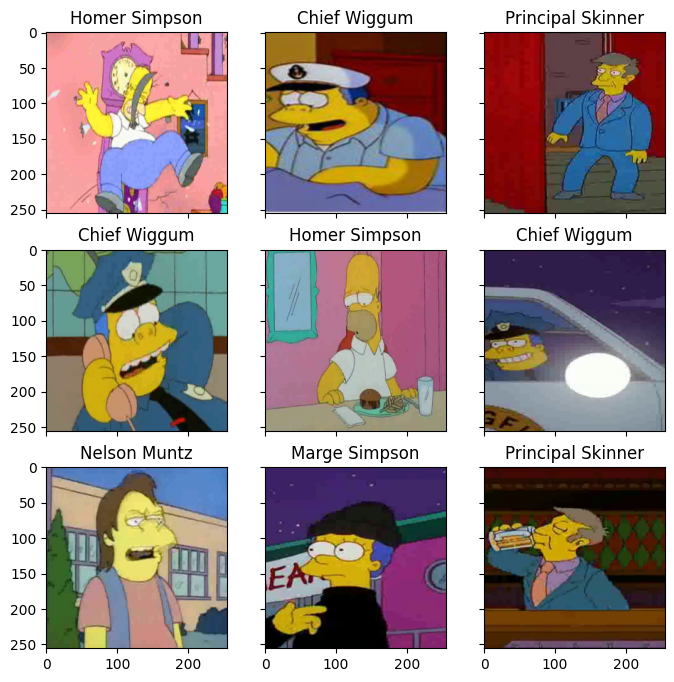

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0, 4500))
    im_val, label = image_datasets['train'][random_characters]
    # inverse_transform это метод LabelEncoder(), мы закодировали цифрами классы, с помощью inverse_transform из чисел вернём название класса
    # получаем имя персонажа с заглавных букв
    img_label = " ".join(map(lambda x: x.capitalize(),\
                image_datasets['val'].label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

Ну теперь сам наконец-то)

Нужно реализовать простенькую CNN (на самом деле можете какую угодно сколько сложную CNN реализовать). Что важно: на вход должна передаваться трех-канальная картинка размером (input_size, input_size). На выходе должен быть вектор длинной num_classes, то есть должны получаться логиты для каждого класса.

При этом конечно мы ожидаем, что вы поработаете с операциями свертки) Можете попробовать реализовать residual connection (https://arxiv.org/pdf/1512.03385 или https://habr.com/ru/companies/slsoft/articles/855602/)

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
import seaborn as sn

In [17]:
class SimpsonsClassifier(nn.Module):
    """
    Простая CNN-модель для классификации персонажей Симпсонов.
    Подходит для входных изображений квадратного размера (input_size x input_size).
    """

    def __init__(self, input_size: int, num_classes: int):
        super(SimpsonsClassifier, self).__init__() # зачем это кстати? - инициализируем родительский класс

        # Your code here
        # 1й сверточный слой
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        # 2й сверточный слой
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # 3й сверточный слой
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # 4й сверточный слой
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        self.pool = nn.MaxPool2d(2, 2)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4)) # для решения проблемы несовпадения входных изображений

        # Полносвязные слои
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)

        x = F.relu(self.bn4(self.conv4(x)))
        x = self.adaptive_pool(x)

        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        out = self.fc2(x)

        return out


In [18]:
def visualization(train, val, is_loss = True):

  if is_loss:
    plt.figure(figsize=(17,10))
    plt.plot(train, label = 'Training loss')
    plt.plot(val, label = 'Val loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

  else:
    plt.figure(figsize=(17,10))
    plt.plot(train, label = 'Training acc')
    plt.plot(val, label = 'Val acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

In [19]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    """
    Базовый цикл обучения и валидации PyTorch-модели с переносом на выбранное устройство (CPU/GPU).

    Параметры
    ----------
    model : torch.nn.Module
        Обучаемая модель.
    dataloaders : dict
        Словарь с двумя ключами: 'train' и 'val'.
        Каждое значение — это DataLoader для соответствующей выборки.
    criterion : torch.nn.Module
    optimizer : torch.optim.Optimizer
    num_epochs : int, optional
        Количество эпох обучения (по умолчанию 25).

    Возвращает
    ----------
    model : torch.nn.Module
        Обученная модель (с весами после последней эпохи).
    history_val : dict
        История валидации: {'loss': [...], 'acc': [...]} по эпохам.
    history_train : dict
        История обучения: {'loss': [...], 'acc': [...]} по эпохам.
    """
    # Автоматически определяем устройство
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Переносим модель на устройство
    model = model.to(device)

    history_val = {'loss': [], 'acc': []}
    history_train = {'loss': [], 'acc': []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 20)

        for phase in ['train', 'val']:
            model.train() if phase == 'train' else model.eval()

            running_loss = 0.0 # сюда складываем лосс для каждого сэмпла
            running_corrects = 0 # сюда складываем число верно угаданных (для подсчета accuracy)
            total_samples = 0 # новая переменная в которую считаем кол-во входов

            for inputs, labels in tqdm.tqdm(dataloaders[phase], desc=phase):
                # Your code here
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total_samples += inputs.size(0)


            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples


            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                history_train['loss'].append(epoch_loss)
                history_train['acc'].append(epoch_acc.item())
            else:
                history_val['loss'].append(epoch_loss)
                history_val['acc'].append(epoch_acc.item())

        print()

    return model, history_val, history_train



In [20]:
model = SimpsonsClassifier(input_size[0], n_classes)
criterion = nn.CrossEntropyLoss() # your code
optimizer = optim.Adam(model.parameters(), lr=0.001) # your code

Ну наконец-то обучаемся (если вы все правильно сделали конечно же)

In [21]:
model, history_val, history_train = train_model(model, dataloaders_dict, criterion, optimizer, num_epochs=15)

Using device: cuda
Epoch 1/15
--------------------


train: 100%|██████████| 458/458 [01:09<00:00,  6.60it/s]


train Loss: 2.3585 Acc: 0.3642


val: 100%|██████████| 197/197 [00:30<00:00,  6.45it/s]


val Loss: 1.8736 Acc: 0.4955

Epoch 2/15
--------------------


train: 100%|██████████| 458/458 [01:08<00:00,  6.72it/s]


train Loss: 1.8071 Acc: 0.5114


val: 100%|██████████| 197/197 [00:29<00:00,  6.68it/s]


val Loss: 1.4788 Acc: 0.5963

Epoch 3/15
--------------------


train: 100%|██████████| 458/458 [01:08<00:00,  6.70it/s]


train Loss: 1.5246 Acc: 0.5802


val: 100%|██████████| 197/197 [00:26<00:00,  7.37it/s]


val Loss: 1.2651 Acc: 0.6525

Epoch 4/15
--------------------


train: 100%|██████████| 458/458 [01:07<00:00,  6.78it/s]


train Loss: 1.3163 Acc: 0.6352


val: 100%|██████████| 197/197 [00:27<00:00,  7.28it/s]


val Loss: 1.0755 Acc: 0.7054

Epoch 5/15
--------------------


train: 100%|██████████| 458/458 [01:08<00:00,  6.72it/s]


train Loss: 1.1380 Acc: 0.6770


val: 100%|██████████| 197/197 [00:26<00:00,  7.46it/s]


val Loss: 1.0770 Acc: 0.6986

Epoch 6/15
--------------------


train: 100%|██████████| 458/458 [01:07<00:00,  6.79it/s]


train Loss: 1.0085 Acc: 0.7123


val: 100%|██████████| 197/197 [00:27<00:00,  7.28it/s]


val Loss: 0.8875 Acc: 0.7537

Epoch 7/15
--------------------


train: 100%|██████████| 458/458 [01:07<00:00,  6.80it/s]


train Loss: 0.8921 Acc: 0.7470


val: 100%|██████████| 197/197 [00:26<00:00,  7.43it/s]


val Loss: 0.7954 Acc: 0.7791

Epoch 8/15
--------------------


train: 100%|██████████| 458/458 [01:07<00:00,  6.80it/s]


train Loss: 0.7791 Acc: 0.7718


val: 100%|██████████| 197/197 [00:26<00:00,  7.38it/s]


val Loss: 0.6987 Acc: 0.8048

Epoch 9/15
--------------------


train: 100%|██████████| 458/458 [01:07<00:00,  6.82it/s]


train Loss: 0.7118 Acc: 0.7921


val: 100%|██████████| 197/197 [00:27<00:00,  7.27it/s]


val Loss: 0.6758 Acc: 0.8225

Epoch 10/15
--------------------


train: 100%|██████████| 458/458 [01:07<00:00,  6.77it/s]


train Loss: 0.6461 Acc: 0.8111


val: 100%|██████████| 197/197 [00:26<00:00,  7.30it/s]


val Loss: 0.6229 Acc: 0.8304

Epoch 11/15
--------------------


train: 100%|██████████| 458/458 [01:09<00:00,  6.58it/s]


train Loss: 0.5931 Acc: 0.8275


val: 100%|██████████| 197/197 [00:27<00:00,  7.10it/s]


val Loss: 0.5964 Acc: 0.8424

Epoch 12/15
--------------------


train: 100%|██████████| 458/458 [01:11<00:00,  6.40it/s]


train Loss: 0.5422 Acc: 0.8381


val: 100%|██████████| 197/197 [00:28<00:00,  6.95it/s]


val Loss: 0.5946 Acc: 0.8408

Epoch 13/15
--------------------


train: 100%|██████████| 458/458 [01:11<00:00,  6.39it/s]


train Loss: 0.4934 Acc: 0.8527


val: 100%|██████████| 197/197 [00:27<00:00,  7.07it/s]


val Loss: 0.5398 Acc: 0.8621

Epoch 14/15
--------------------


train: 100%|██████████| 458/458 [01:09<00:00,  6.56it/s]


train Loss: 0.4505 Acc: 0.8669


val: 100%|██████████| 197/197 [00:29<00:00,  6.73it/s]


val Loss: 0.5654 Acc: 0.8537

Epoch 15/15
--------------------


train: 100%|██████████| 458/458 [01:10<00:00,  6.48it/s]


train Loss: 0.4216 Acc: 0.8702


val: 100%|██████████| 197/197 [00:28<00:00,  7.02it/s]

val Loss: 0.5437 Acc: 0.8610



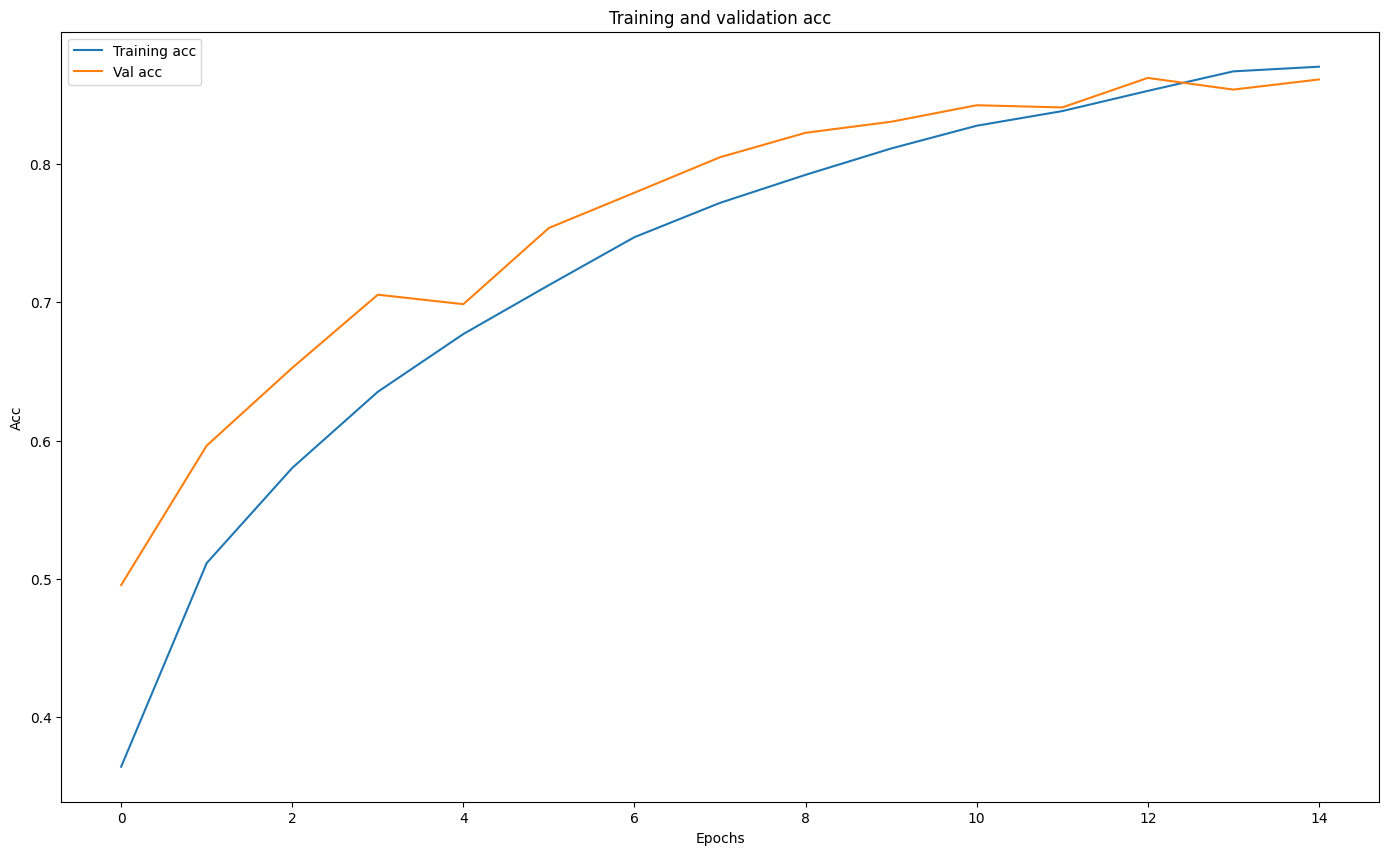

In [22]:
# смотрим точность в каждую из эпох на трейне и тесте
visualization(history_train["acc"], history_val["acc"], is_loss = False)

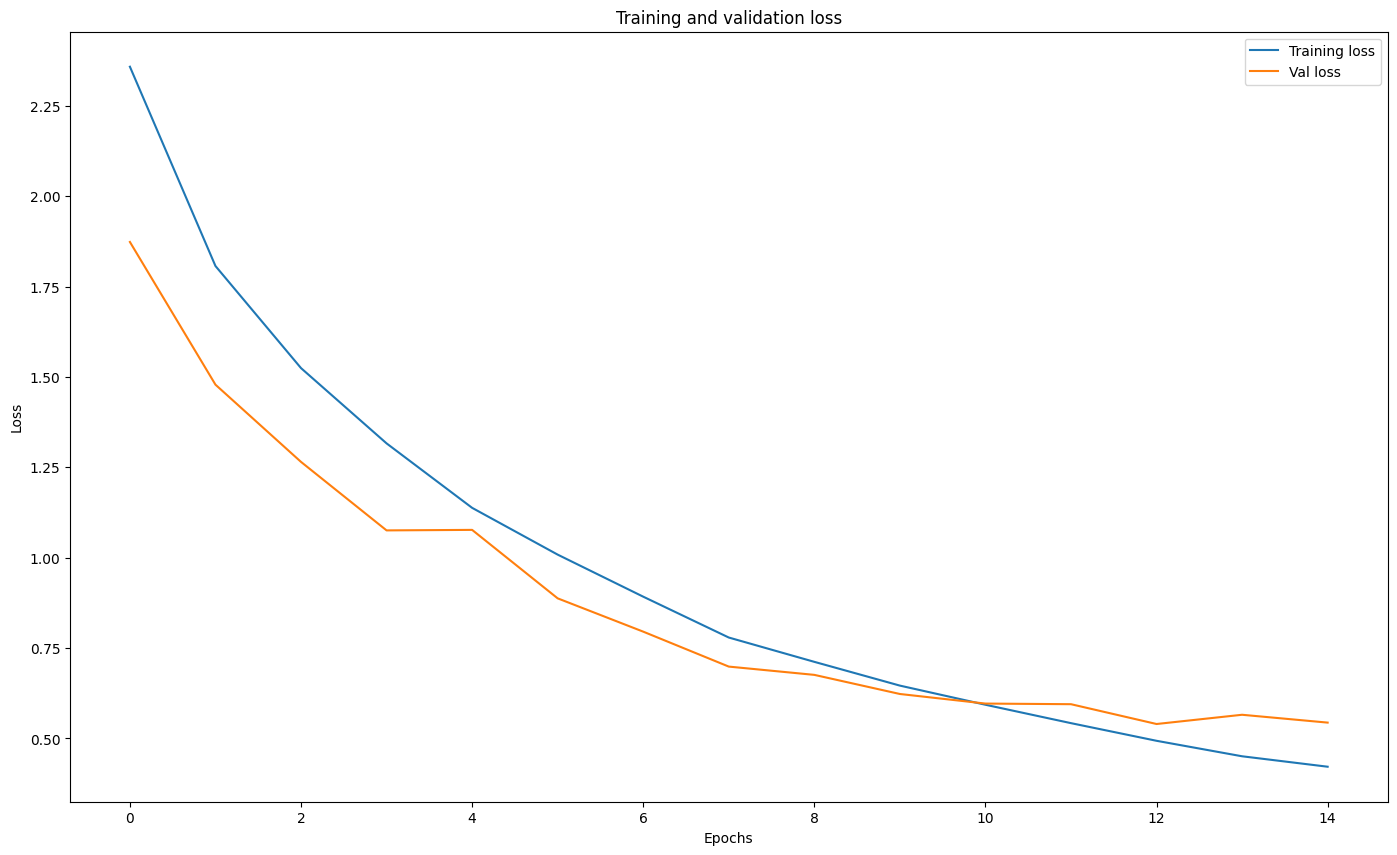

In [23]:
# смотрим лосс в каждую из эпох на трейне и тесте
visualization(history_train["loss"], history_val["loss"], is_loss = True)

In [24]:
def predict_one_sample(model, img_tensor, device=torch.device("cuda" if torch.cuda.is_available() else "cpu")) -> np.ndarray:
    """Функция возвращает np массив вероятностей пренадлежности к каждому из классов по картинке img_tensor.
       То есть вам на вход модели надо передать img_tensor, получить логиты, и не забыть применить softmax, чтобы получить вероятности)
    """
    model.eval()
    with torch.no_grad():
        # Your code here
        if img_tensor.dim() == 3:
            img_tensor = img_tensor.unsqueeze(0).to(device)
        elif img_tensor.dim() == 4:
            img_tensor = img_tensor.to(device)
        else:
            raise ValueError(f"Неожиданная размерность тензора: {img_tensor.dim()}")

        logits = model(img_tensor)
        probabilities = F.softmax(logits, dim=1)
        y_pred = probabilities.cpu().numpy()[0]

    return y_pred

In [25]:
num_classes = len(image_datasets["train"].label_encoder.classes_)

In [26]:
test_model = SimpsonsClassifier(input_size=64, num_classes=num_classes).to(torch.device("cuda"))

# Один фейковый образец
x = torch.randn(3, 64, 64).to(torch.device("cuda"))  # C x H x W

# 1. Проверка типа и формы выхода
probs = predict_one_sample(model, x)
assert isinstance(probs, np.ndarray), "Выход должен быть np.ndarray"
assert probs.shape == (num_classes,), f"Ожидалась форма ({num_classes},), а получили {probs.shape}"
print("Тест 1: форма и тип выхода корректны")

# 2. Проверка, что вероятности суммируются в 1
s = probs.sum()
assert np.isclose(s, 1.0, atol=1e-5), f"Сумма вероятностей должна быть 1, а сейчас {s}"
print("Тест 2: сумма вероятностей = 1")

# 3. Проверка, что нет отрицательных вероятностей
assert np.all(probs >= 0), "Вероятности не могут быть отрицательными"
print("Тест 3: все вероятности >= 0")

Тест 1: форма и тип выхода корректны
Тест 2: сумма вероятностей = 1
Тест 3: все вероятности >= 0


In [27]:
def predict(model, dataloader, device=torch.device("cuda" if torch.cuda.is_available() else "cpu")) -> np.ndarray:
    """Делает предсказания для всего даталоадера. Нужно проитерироваться по даталоадеру, получить предикты модели (только класс в виде числа, через argmax),
       сложить все предсказания в preds и вернуть мне его в виде np.ndarray.
    """
    preds = []
    model.eval()
    with torch.no_grad():
      # Your code here
      for inputs, _ in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            preds.extend(predicted.cpu().numpy())

    return preds


def build_confusion_matrix(model, dataloader, true_labels, class_names, device):
    """
    Строит confusion matrix по предсказаниям модели и реальным меткам.
    """
    preds = predict(model, dataloader, device)
    cm = sk_confusion_matrix(true_labels, preds)

    plt.subplots(figsize=(20,20))
    sn.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="YlGnBu",
        linewidths=0.5,
        cbar=False,
        vmax = 30,
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


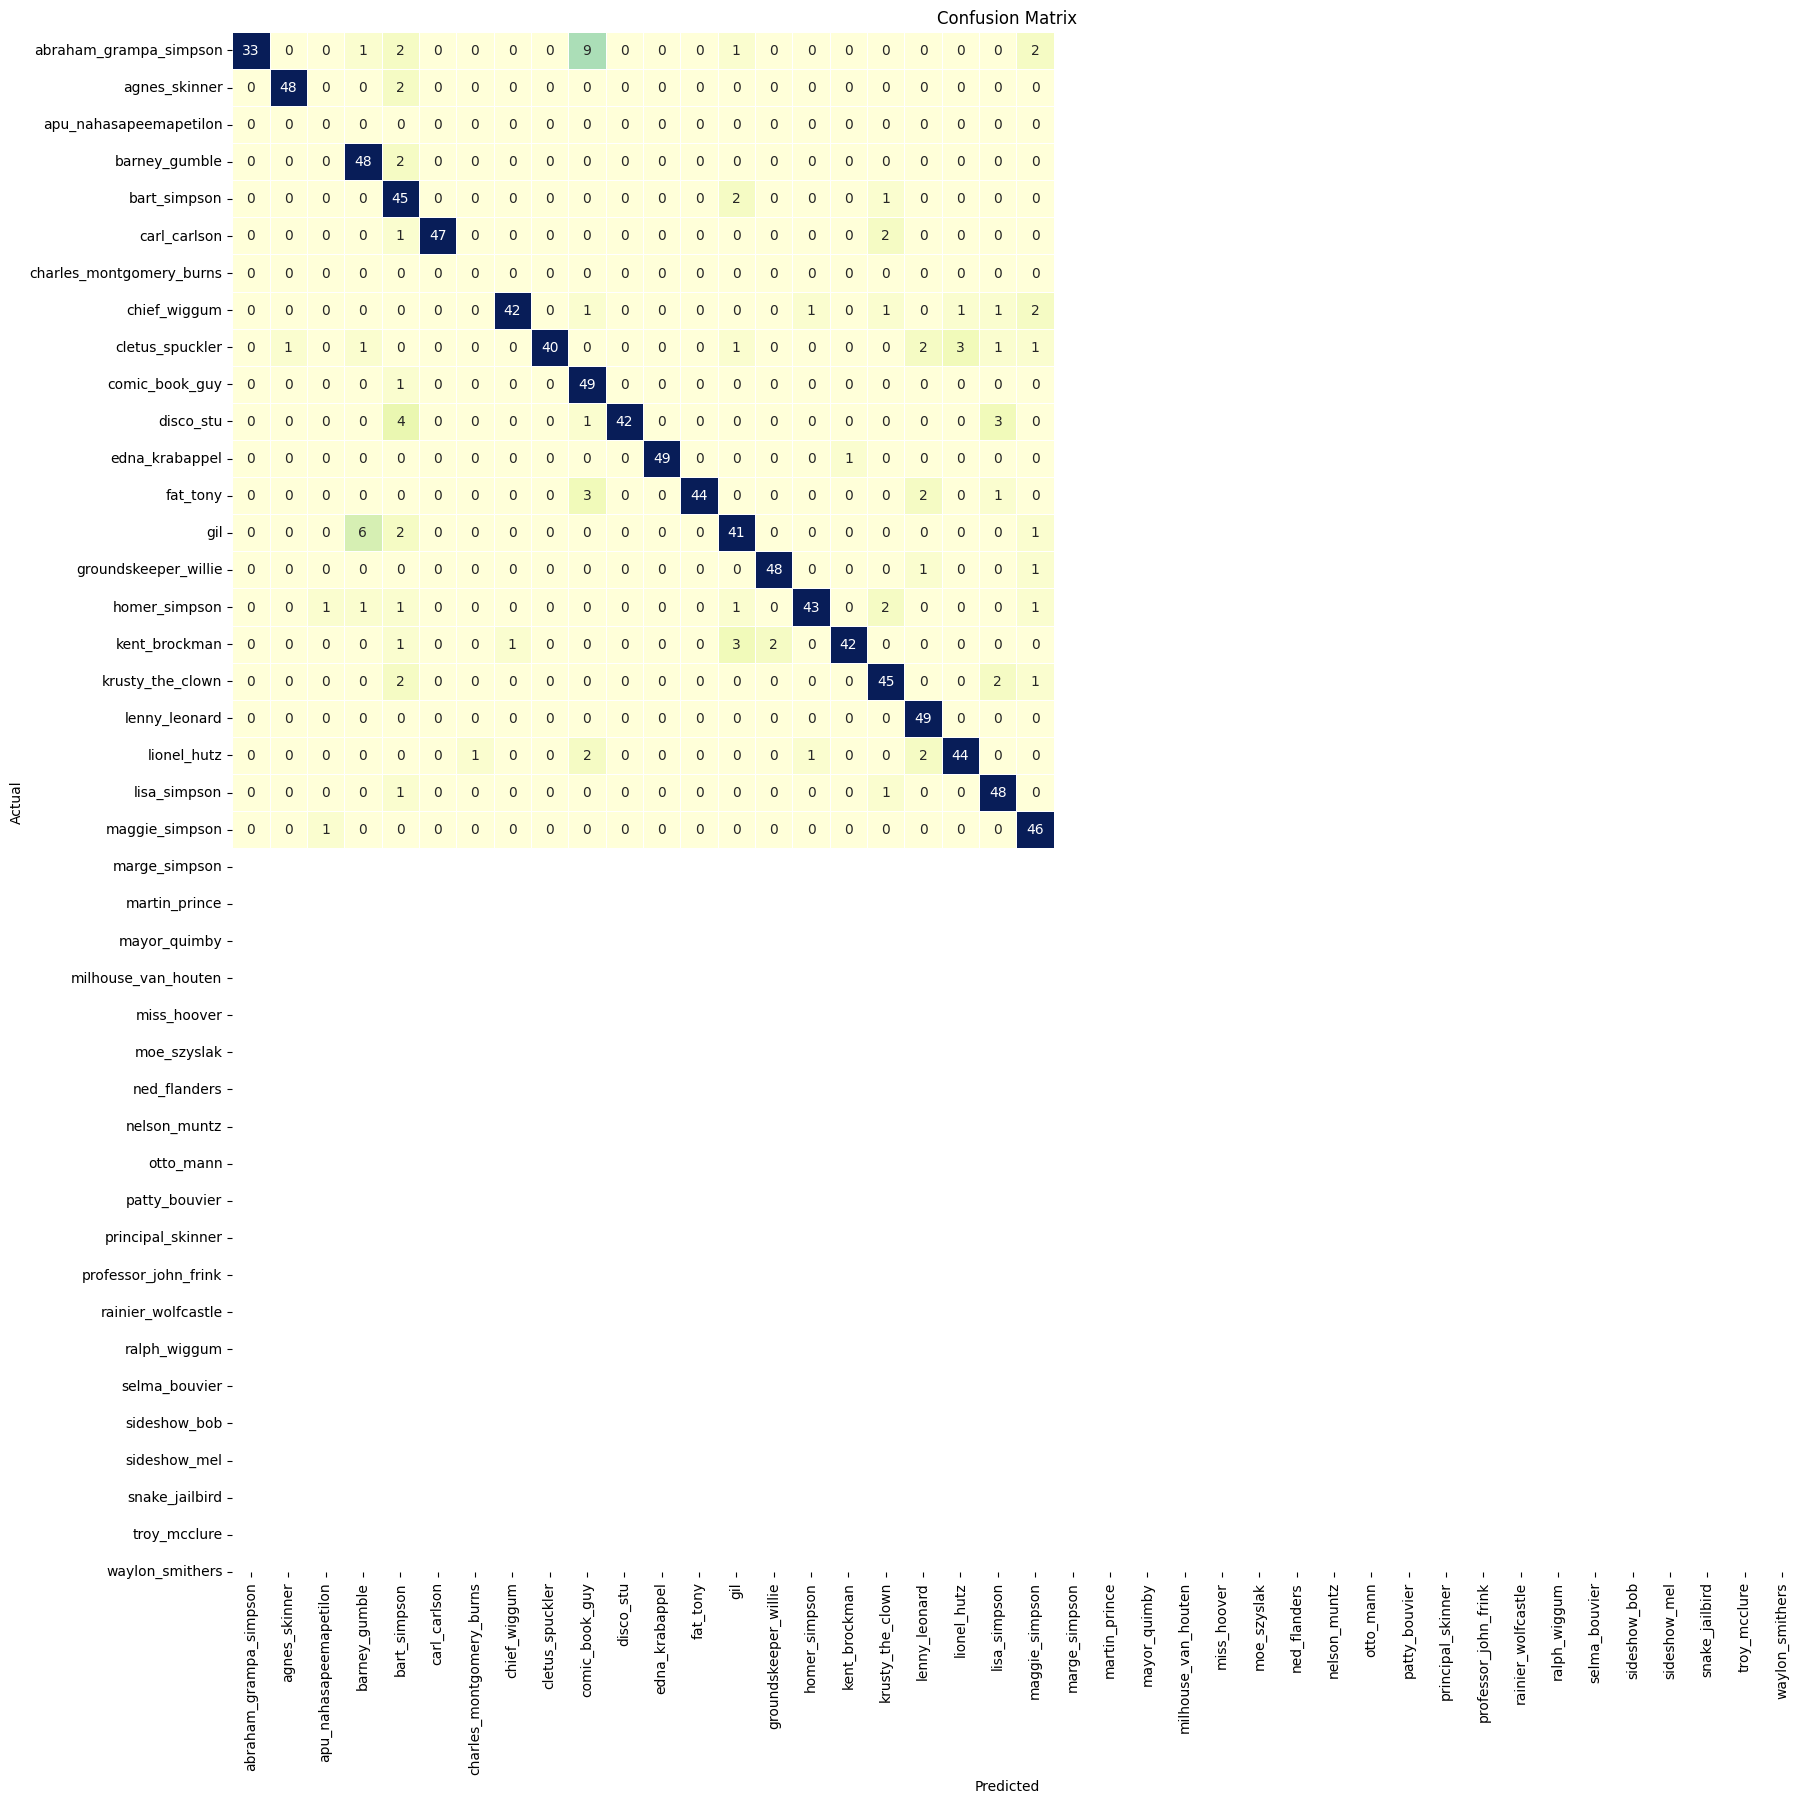

In [28]:
# Строим confusion_matrix
true_labels = [image_datasets_test[i][1] for i in range(len(image_datasets_test))]
build_confusion_matrix(model, dataloader_test, true_labels, image_datasets["train"].label_encoder.classes_, torch.device("cuda") if torch.cuda.is_available() else "cpu")

Теперь посмотрим, какие предикты мы получили (можно запускать несколько раз, будут разные картинки))

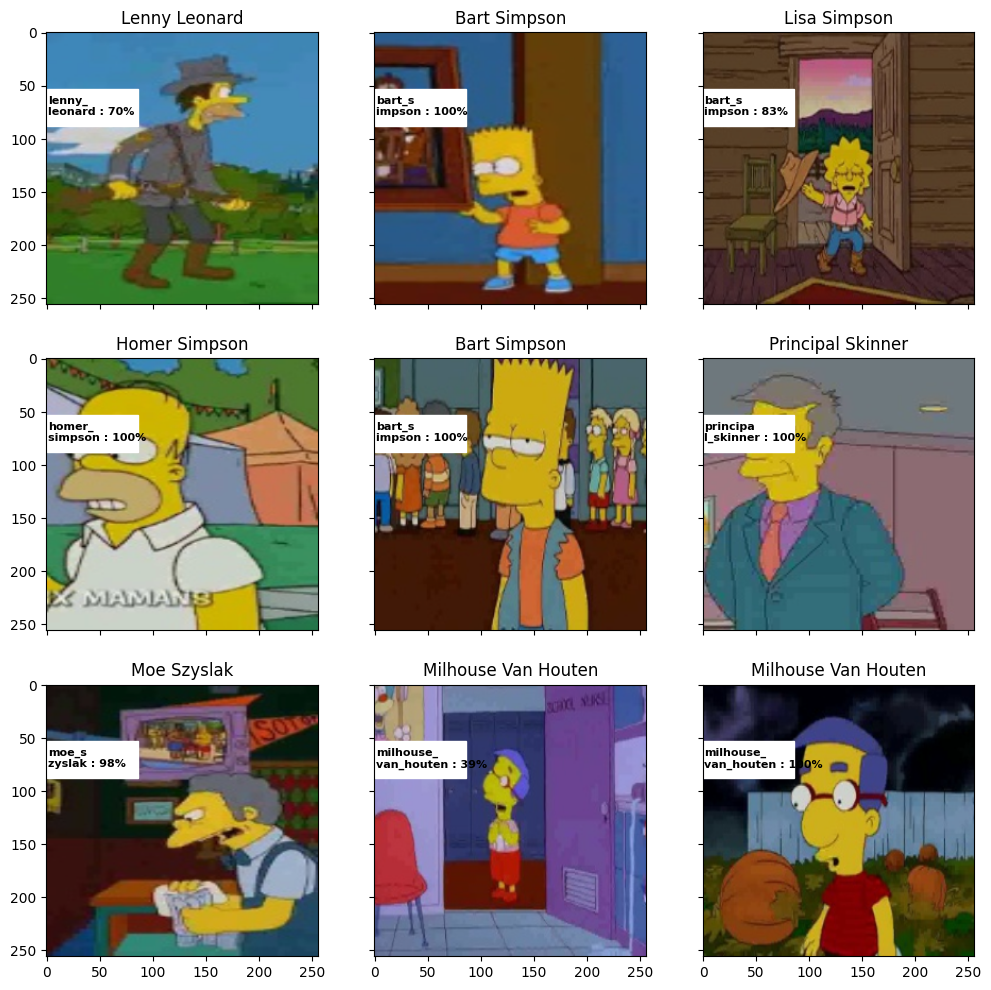

In [29]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), \
                        sharey=True, sharex=True)

label_encoder = image_datasets["train"].label_encoder

for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0, 1000))
    im_val, label = image_datasets_test[random_characters]
    # inverse_transform это метод LabelEncoder(), мы закодировали цифрами классы, с помощью inverse_transform из чисел вернём название класса
    # получаем имя персонажа с заглавных букв
    img_label = " ".join(map(lambda x: x.capitalize(),\
                label_encoder.inverse_transform([label])[0].split('_')))

    imshow(im_val.data.cpu(), \
          title=img_label, plt_ax=fig_x)

    actual_text = "Actual : {}".format(img_label)

    # добавим область на которой будем выводить вероятность
    fig_x.add_patch(patches.Rectangle((0, 53), 86, 35, color='white'))
    font0 = FontProperties()
    font = font0.copy()
    prob_pred = predict_one_sample(model, im_val.unsqueeze(0))
    # получаем вероятность
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)

    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)

    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

Ну все, теперь все по-взрослому)))

Теперь вместо обучения модели с нуля мы возьмём предобученный бэкбон (буквально позвоночник) — это основная часть сети, которая уже обучалась на огромном датасете (например, ImageNet) и умеет извлекать универсальные признаки из изображений: текстуры, формы, объекты и т.д.

Используя такой бэкбон, мы переносим уже накопленные знания на нашу задачу.
Обычно замораживают его слои (чтобы не менять предобученные веса) и обучают только новую классификационную голову — это быстрее и даёт лучшее качество, особенно на небольших датасетах.
При желании позже можно «разморозить» часть бэкбона и дообучить всю модель (fine-tuning).

В нашем случае мы возьмём ViT, заменим классификационную голову на новую под число персонажей и дообучим её

In [30]:
from transformers import ViTImageProcessor, ViTForImageClassification

# https://huggingface.co/google/vit-base-patch16-224
# Про архитектуру этой модели поговорим позже, когда узнаем про трансформеры)
model_name = "google/vit-base-patch16-224"
model_processor = ViTImageProcessor.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [31]:
model = ViTForImageClassification.from_pretrained(
    model_name,
    num_labels=n_classes,
    ignore_mismatched_sizes=True
)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([42]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([42, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
model

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

In [33]:
for name, param in model.named_parameters():
    # Замораживаем всё кроме классификационной головы, тут приветствуются эксперименты)
    if "classifier" not in name:
        param.requires_grad = False

In [34]:
class SimpsonsDatasetWithProcessor(Dataset):
    def __init__(self, files_path, processor=model_processor, is_test=False, label_encoder=None):
        self.files_path = files_path
        self.processor = processor
        self.is_test = is_test

        if not is_test:
            self.labels_str = [p.parent.name for p in self.files_path]
        else:
            self.labels_str = [extract_label_from_filename(p.name) for p in self.files_path]

        if label_encoder is None:
            self.label_encoder = LabelEncoder()
            self.label_encoder.fit(self.labels_str)
        else:
            self.label_encoder = label_encoder

    def __len__(self):
        return len(self.files_path)

    def __getitem__(self, idx):
        img_path = self.files_path[idx]
        image = Image.open(img_path).convert("RGB")
        inputs = self.processor(images=image, return_tensors="pt")
        image = inputs["pixel_values"].squeeze(0)

        label_str = self.labels_str[idx]
        label = self.label_encoder.transform([label_str]).item()

        return image, label


In [35]:
image_datasets = {mode: SimpsonsDatasetWithProcessor(train_val_paths[mode]) for mode in ['train', 'val']}
image_datasets_test = SimpsonsDatasetWithProcessor(test_path, is_test=True, label_encoder=image_datasets["train"].label_encoder)

batch_size = 32
dataloaders_dict = {'train': torch.utils.data.DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True, num_workers=4),
                    'val': torch.utils.data.DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=True, num_workers=4)}
dataloader_test = torch.utils.data.DataLoader(image_datasets_test, batch_size=batch_size, shuffle=False, num_workers=4)

In [36]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    """
    Базовый цикл обучения и валидации PyTorch-модели с переносом на выбранное устройство (CPU/GPU).

    Параметры
    ----------
    model : torch.nn.Module
        Обучаемая модель.
    dataloaders : dict
        Словарь с двумя ключами: 'train' и 'val'.
        Каждое значение — это DataLoader для соответствующей выборки.
    criterion : torch.nn.Module
        Функция потерь (например, nn.CrossEntropyLoss()).
    optimizer : torch.optim.Optimizer
        Оптимизатор (например, Adam или SGD).
    num_epochs : int, optional
        Количество эпох обучения (по умолчанию 25).

    Возвращает
    ----------
    model : torch.nn.Module
        Обученная модель (с весами после последней эпохи).
    history_val : dict
        История валидации: {'loss': [...], 'acc': [...]} по эпохам.
    history_train : dict
        История обучения: {'loss': [...], 'acc': [...]} по эпохам.
    """
    # Автоматически определяем устройство
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Переносим модель на устройство
    model = model.to(device)

    history_val = {'loss': [], 'acc': []}
    history_train = {'loss': [], 'acc': []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 20)

        for phase in ['train', 'val']:
            model.train() if phase == 'train' else model.eval()

            running_loss = 0.0
            running_corrects = 0
            total_samples = 0 # mycode

            for inputs, labels in tqdm.tqdm(dataloaders[phase], desc=phase):
                # Your code here. Все примерно то же самое, только немного по-другому предикты получаются, аккуратнее)
                inputs, labels = inputs.to(device), labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    logits = outputs.logits
                    loss = criterion(logits, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                preds = torch.argmax(logits, dim=1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total_samples += inputs.size(0)

            epoch_loss = running_loss / total_samples
            epoch_acc = running_corrects.double() / total_samples


            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                history_train['loss'].append(epoch_loss)
                history_train['acc'].append(epoch_acc.item())
            else:
                history_val['loss'].append(epoch_loss)
                history_val['acc'].append(epoch_acc.item())

        print()

    return model, history_val, history_train



In [37]:
criterion = nn.CrossEntropyLoss() # Your code here
optimizer = optim.AdamW(model.parameters(), lr=0.001) # Your code here

model, history_val, history_train = train_model(
    model, dataloaders_dict, criterion, optimizer, num_epochs=10
)

Using device: cuda
Epoch 1/10
--------------------


train: 100%|██████████| 458/458 [02:48<00:00,  2.72it/s]


train Loss: 1.7665 Acc: 0.5550


val: 100%|██████████| 197/197 [01:12<00:00,  2.72it/s]


val Loss: 1.2746 Acc: 0.6669

Epoch 2/10
--------------------


train: 100%|██████████| 458/458 [02:42<00:00,  2.81it/s]


train Loss: 0.9981 Acc: 0.7510


val: 100%|██████████| 197/197 [01:10<00:00,  2.81it/s]


val Loss: 0.9853 Acc: 0.7457

Epoch 3/10
--------------------


train: 100%|██████████| 458/458 [02:42<00:00,  2.82it/s]


train Loss: 0.7683 Acc: 0.8061


val: 100%|██████████| 197/197 [01:10<00:00,  2.81it/s]


val Loss: 0.8941 Acc: 0.7631

Epoch 4/10
--------------------


train: 100%|██████████| 458/458 [02:42<00:00,  2.82it/s]


train Loss: 0.6416 Acc: 0.8382


val: 100%|██████████| 197/197 [01:10<00:00,  2.81it/s]


val Loss: 0.8096 Acc: 0.7932

Epoch 5/10
--------------------


train: 100%|██████████| 458/458 [02:42<00:00,  2.82it/s]


train Loss: 0.5554 Acc: 0.8632


val: 100%|██████████| 197/197 [01:10<00:00,  2.81it/s]


val Loss: 0.7649 Acc: 0.7987

Epoch 6/10
--------------------


train: 100%|██████████| 458/458 [02:42<00:00,  2.81it/s]


train Loss: 0.4949 Acc: 0.8797


val: 100%|██████████| 197/197 [01:10<00:00,  2.81it/s]


val Loss: 0.7396 Acc: 0.8027

Epoch 7/10
--------------------


train: 100%|██████████| 458/458 [02:43<00:00,  2.81it/s]


train Loss: 0.4450 Acc: 0.8897


val: 100%|██████████| 197/197 [01:10<00:00,  2.81it/s]


val Loss: 0.7353 Acc: 0.8068

Epoch 8/10
--------------------


train: 100%|██████████| 458/458 [02:42<00:00,  2.82it/s]


train Loss: 0.4074 Acc: 0.9023


val: 100%|██████████| 197/197 [01:10<00:00,  2.79it/s]


val Loss: 0.7144 Acc: 0.8097

Epoch 9/10
--------------------


train: 100%|██████████| 458/458 [02:42<00:00,  2.82it/s]


train Loss: 0.3777 Acc: 0.9108


val: 100%|██████████| 197/197 [01:10<00:00,  2.80it/s]


val Loss: 0.7150 Acc: 0.8104

Epoch 10/10
--------------------


train: 100%|██████████| 458/458 [02:42<00:00,  2.82it/s]


train Loss: 0.3487 Acc: 0.9158


val: 100%|██████████| 197/197 [01:10<00:00,  2.81it/s]

val Loss: 0.7064 Acc: 0.8094



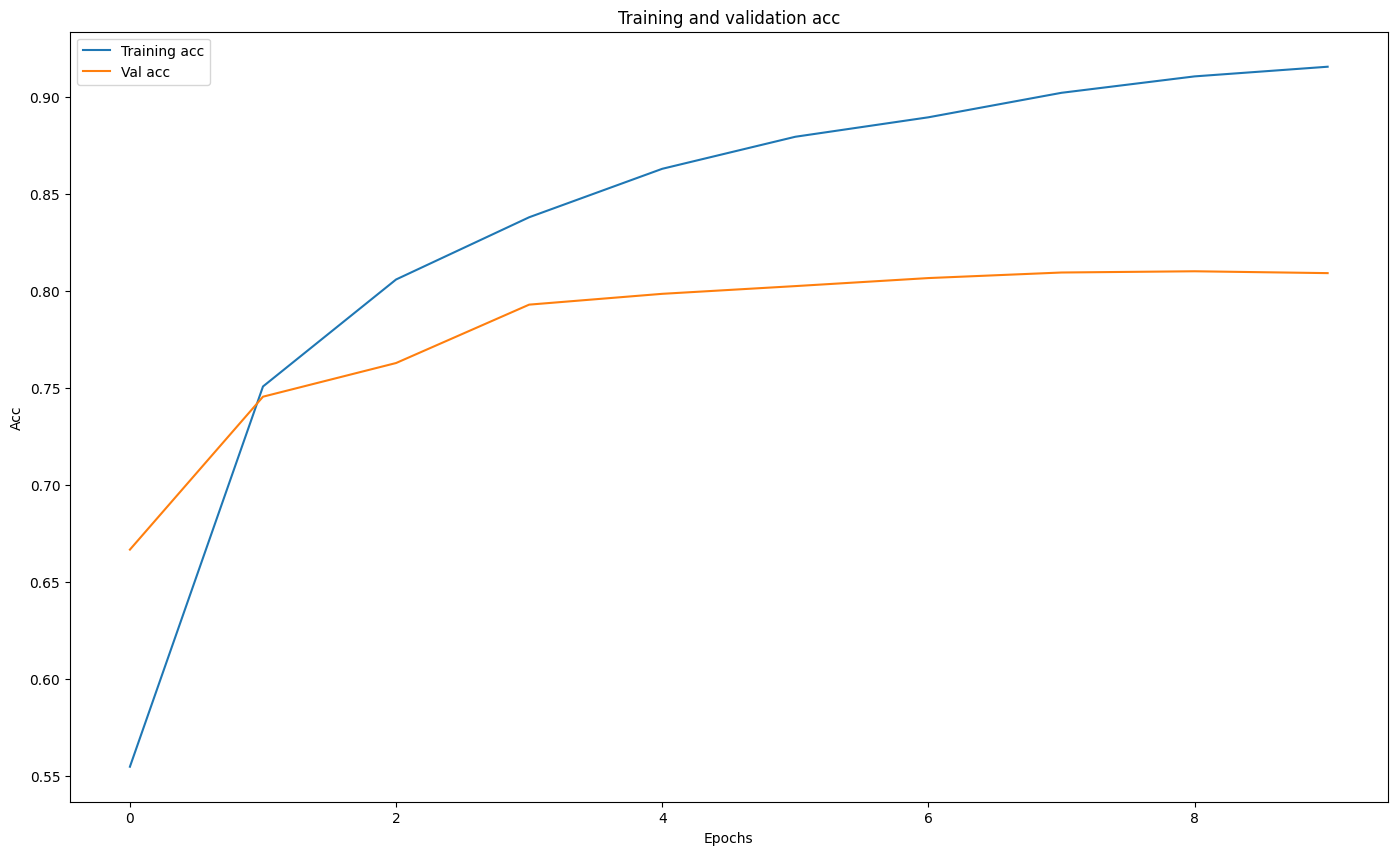

In [38]:
visualization(history_train["acc"], history_val["acc"], is_loss = False)

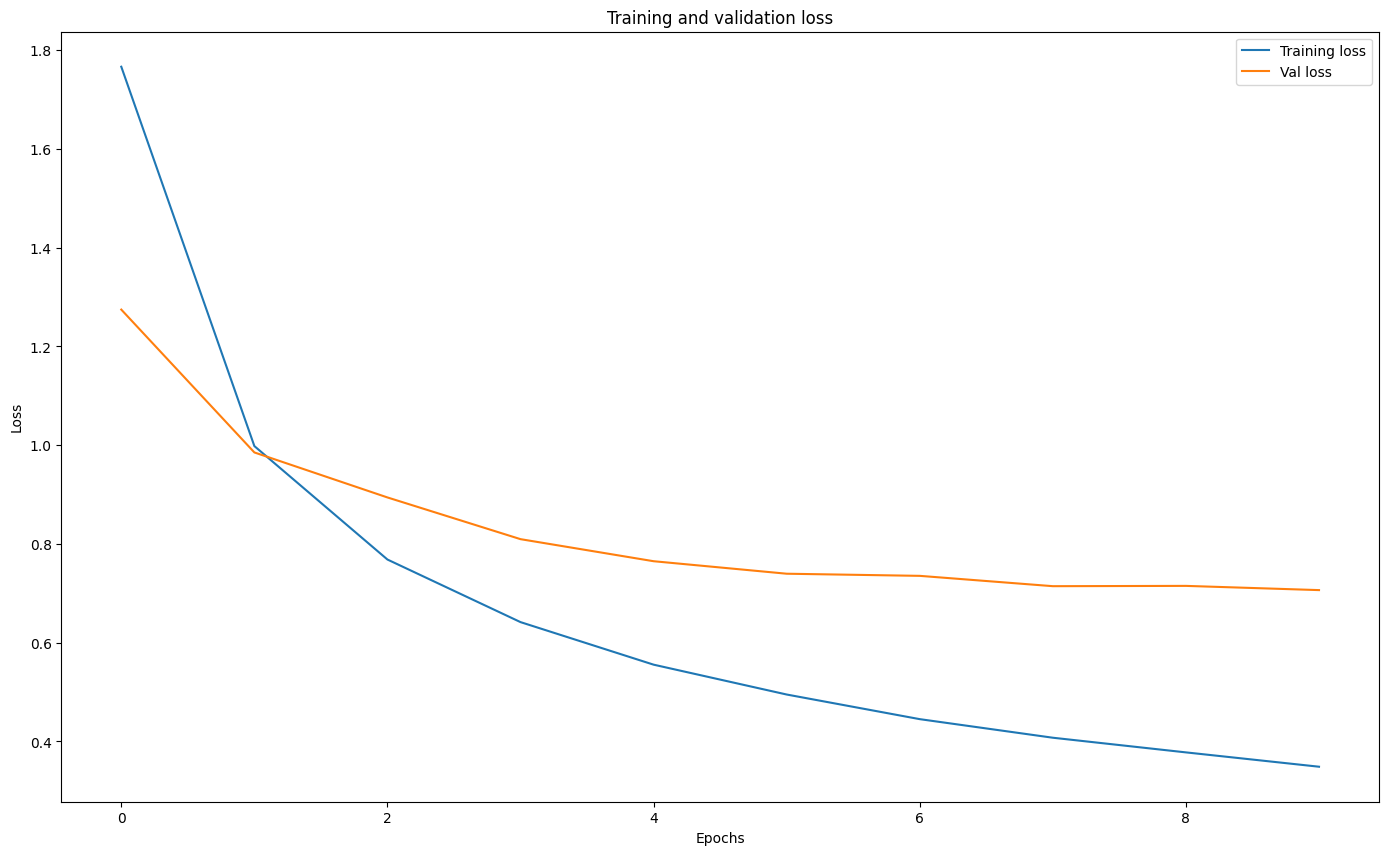

In [39]:
visualization(history_train["loss"], history_val["loss"], is_loss = True)

In [40]:
true_labels = [image_datasets_test[i][1] for i in range(len(image_datasets_test))]

# whooops, кажется тут тоже кое-что поменять надо)) логиты чучут по-другому получаются
'''
build_confusion_matrix(
    model,
    dataloader_test,
    true_labels,
    image_datasets['train'].label_encoder.classes_,
    torch.device("cuda") if torch.cuda.is_available() else "cpu")
'''

def build_confusion_matrix(model, dataloader, true_labels, class_names, device):
    model.eval()
    all_preds = []

    with torch.no_grad():
        for inputs, _ in tqdm.tqdm(dataloader, desc="Predicting"):
            inputs = inputs.to(device)
            outputs = model(inputs)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            all_preds.extend(preds.cpu().numpy())

build_confusion_matrix(
    model,
    dataloader_test,
    true_labels,
    image_datasets['train'].label_encoder.classes_,
    torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
)

Predicting: 100%|██████████| 31/31 [00:11<00:00,  2.63it/s]


In [41]:
def predict_one_sample(model, image):
    device = "cuda" # Костыль?
    model.eval()
    image = image.to(device)
    with torch.no_grad():
        outputs = model(image)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
    return probabilities.cpu().numpy()[0]

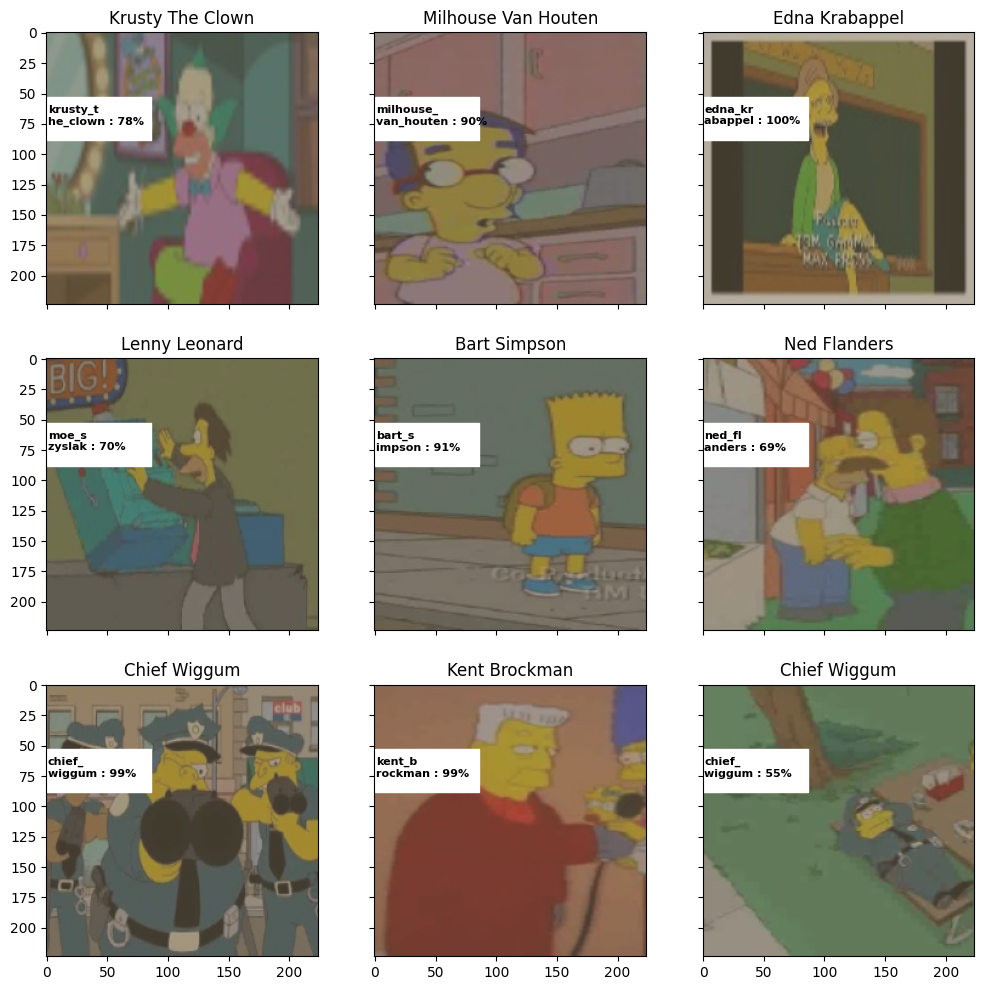

In [44]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), \
                        sharey=True, sharex=True)

label_encoder = image_datasets['train'].label_encoder

for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0, 1000))
    im_val, label = image_datasets_test[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                label_encoder.inverse_transform([label])[0].split('_')))

    imshow(im_val.data.cpu(), \
          title=img_label, plt_ax=fig_x)

    actual_text = "Actual : {}".format(img_label)

    fig_x.add_patch(patches.Rectangle((0, 53), 86, 35, color='white'))
    font0 = FontProperties()
    font = font0.copy()
    prob_pred = predict_one_sample(model, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)

    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)

    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')